In [153]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sn

In [154]:
# lets upoad the file we are analysing

phones=pd.read_csv(r"C:\Users\USER\Desktop\datasets\Mobiles Dataset (2025).csv")
phones

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,POCO,M7 5G 128GB,198g,6GB,8MP,50MP,MediaTek Dimensity 7025,5110mAh,6.67 inches,"PKR 39,999","INR 15,999","CNY 1,599",USD 229,AED 899,2024
925,Poco,Pad 5G 128GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"PKR 66,220","INR 23,999","CNY 2,099",USD 280,"AED 1,029",2024
926,Poco,Pad 5G 256GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"PKR 71,220","INR 25,999","CNY 2,299",USD 300,"AED 1,099",2024
927,Samsung,Galaxy Z Fold6 256GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"PKR 604,999","INR 164,999","?3,999","USD 1,899","AED 7,199",2024


In [155]:
#lets locate the missing data

missing=phones.isnull().sum()
missing

Company Name                 0
Model Name                   0
Mobile Weight                0
RAM                          0
Front Camera                 0
Back Camera                  0
Processor                    0
Battery Capacity             0
Screen Size                  0
Launched Price (Pakistan)    0
Launched Price (India)       0
Launched Price (China)       0
Launched Price (USA)         0
Launched Price (Dubai)       0
Launched Year                0
dtype: int64

In [156]:
#lets clean the dataframe and remove all units of measurements and keep only useful data

phones["Launched Price (Pakistan)"]=phones["Launched Price (Pakistan)"].str.replace("PKR", "").str.replace(",","").astype(str)
phones["Launched Price (India)"]=phones["Launched Price (India)"].str.replace("INR", "").str.replace(",","").astype(str)
phones["Launched Price (China)"]=phones["Launched Price (China)"].str.replace("CNY", "").str.replace(",","").str.replace("?","").astype(str)
phones["Launched Price (USA)"]=phones["Launched Price (USA)"].str.replace("USD", "").str.replace(",","").astype(str)
phones["Launched Price (Dubai)"]=phones["Launched Price (Dubai)"].str.replace("AED", "").str.replace(",","").astype(str)

In [157]:
phones['RAM']=phones['RAM'].str.extract("(\d+)GB")
phones['Model Name']=phones['Model Name'].str.extract("(\d+)GB")
phones['Battery Capacity']=phones['Battery Capacity'].str.replace(",","")
phones['Battery Capacity']=phones['Battery Capacity'].str.extract("(\d+)mAh")
phones['Front Camera']=phones['Front Camera'].str.extract("(\d+)MP")
phones['Back Camera']=phones['Back Camera'].str.extract("(\d+)MP")
phones['Screen Size']=phones['Screen Size'].str.extract("(\d+(?:\.\d+)?)")
phones

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\USER\AppData\Local\Temp\ipykernel_16944\627999109.py:1: SyntaxWarning: invalid escape sequence '\d'
  phones['RAM']=phones['RAM'].str.extract("(\d+)GB")
C:\Users\USER\AppData\Local\Temp\ipykernel_16944\627999109.py:2: SyntaxWarning: invalid escape sequence '\d'
  phones['Model Name']=phones['Model Name'].str.extract("(\d+)GB")
C:\Users\USER\AppData\Local\Temp\ipykernel_16944\627999109.py:

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,128,174g,6,12,48,A17 Bionic,3600,6.1,224999,79999,5799,799,2799,2024
1,Apple,256,174g,6,12,48,A17 Bionic,3600,6.1,234999,84999,6099,849,2999,2024
2,Apple,512,174g,6,12,48,A17 Bionic,3600,6.1,244999,89999,6499,899,3199,2024
3,Apple,128,203g,6,12,48,A17 Bionic,4200,6.7,249999,89999,6199,899,3199,2024
4,Apple,256,203g,6,12,48,A17 Bionic,4200,6.7,259999,94999,6499,949,3399,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,POCO,128,198g,6,8,50,MediaTek Dimensity 7025,5110,6.67,39999,15999,1599,229,899,2024
925,Poco,128,571g,8,8,8,Snapdragon 7s Gen 2,10000,12.1,66220,23999,2099,280,1029,2024
926,Poco,256,571g,8,8,8,Snapdragon 7s Gen 2,10000,12.1,71220,25999,2299,300,1099,2024
927,Samsung,256,239g,12,10,50,Snapdragon 8 Gen 3,4400,7.6,604999,164999,3999,1899,7199,2024


In [158]:
phones.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,128,174g,6,12,48,A17 Bionic,3600,6.1,224999,79999,5799,799,2799,2024
1,Apple,256,174g,6,12,48,A17 Bionic,3600,6.1,234999,84999,6099,849,2999,2024
2,Apple,512,174g,6,12,48,A17 Bionic,3600,6.1,244999,89999,6499,899,3199,2024
3,Apple,128,203g,6,12,48,A17 Bionic,4200,6.7,249999,89999,6199,899,3199,2024
4,Apple,256,203g,6,12,48,A17 Bionic,4200,6.7,259999,94999,6499,949,3399,2024


In [159]:

#converting all currencies to USD for accurate comparison at Launch Price
phones["Launched Price (Pakistan)"]=phones["Launched Price (Pakistan)"].astype(int)*0.0036
phones["Launched Price (India)"]=phones["Launched Price (India)"].astype(int)*0.011
phones["Launched Price (China)"]=phones["Launched Price (China)"].astype(int)*0.14
phones["Launched Price (Dubai)"]=phones["Launched Price (Dubai)"].astype(int)*0.27

phones.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,128,174g,6,12,48,A17 Bionic,3600,6.1,809.9964,879.989,811.86,799,755.73,2024
1,Apple,256,174g,6,12,48,A17 Bionic,3600,6.1,845.9964,934.989,853.86,849,809.73,2024
2,Apple,512,174g,6,12,48,A17 Bionic,3600,6.1,881.9964,989.989,909.86,899,863.73,2024
3,Apple,128,203g,6,12,48,A17 Bionic,4200,6.7,899.9964,989.989,867.86,899,863.73,2024
4,Apple,256,203g,6,12,48,A17 Bionic,4200,6.7,935.9964,1044.989,909.86,949,917.73,2024


In [160]:
#lets remove some columns that are not vital to our analysis

phones= phones.drop(columns=["Mobile Weight", "Processor"])

phones.head()

,Company Name,Model Name,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,128,6,12,48,3600,6.1,809.9964,879.989,811.86,799,755.73,2024
1,Apple,256,6,12,48,3600,6.1,845.9964,934.989,853.86,849,809.73,2024
2,Apple,512,6,12,48,3600,6.1,881.9964,989.989,909.86,899,863.73,2024
3,Apple,128,6,12,48,4200,6.7,899.9964,989.989,867.86,899,863.73,2024
4,Apple,256,6,12,48,4200,6.7,935.9964,1044.989,909.86,949,917.73,2024


In [161]:
phones["Company Name"]= phones["Company Name"].astype("category")
phones["Company Name"]=phones["Company Name"].cat.codes
phones["Company Name"].tail()

924    10
925    11
926    11
927    13
928    13
Name: Company Name, dtype: int8

In [162]:
phones.corr()


,Company Name,Model Name,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
Company Name,1.000000,-0.083315,0.127915,0.175715,0.173160,0.079768,-0.059461,-0.214594,-0.283319,-0.265931,-0.084948,-0.242921,0.124027
Model Name,-0.083315,1.000000,0.592310,0.340459,0.202544,0.055321,0.068941,0.463637,0.551499,0.546561,0.565466,0.546190,0.279106
RAM,0.127915,0.592310,1.000000,0.454164,0.438450,0.140451,0.049739,0.412444,0.419380,0.423778,0.106463,0.475937,0.372820
Front Camera,0.175715,0.340459,0.454164,1.000000,0.447862,-0.158395,-0.221912,-0.020662,0.021050,0.025532,-0.004464,0.062819,0.165116
Back Camera,0.173160,0.202544,0.438450,0.447862,1.000000,-0.102444,-0.260045,0.082843,0.035243,0.037512,-0.013960,0.090052,0.320879
Battery Capacity,0.079768,0.055321,0.140451,-0.158395,-0.102444,1.000000,0.879776,-0.040874,-0.006045,-0.019665,0.064591,-0.036226,0.352675
Screen Size,-0.059461,0.068941,0.049739,-0.221912,-0.260045,0.879776,1.000000,0.064332,0.108054,0.106540,0.095479,0.079445,0.138926
Launched Price (Pakistan),-0.214594,0.463637,0.412444,-0.020662,0.082843,-0.040874,0.064332,1.000000,0.904178,0.891082,0.255479,0.898456,0.098929
Launched Price (India),-0.283319,0.551499,0.419380,0.021050,0.035243,-0.006045,0.108054,0.904178,1.000000,0.963153,0.275404,0.969074,0.067155
Launched Price (China),-0.265931,0.546561,0.423778,0.025532,0.037512,-0.019665,0.106540,0.891082,0.963153,1.000000,0.268864,0.963527,0.021447


<Axes: >

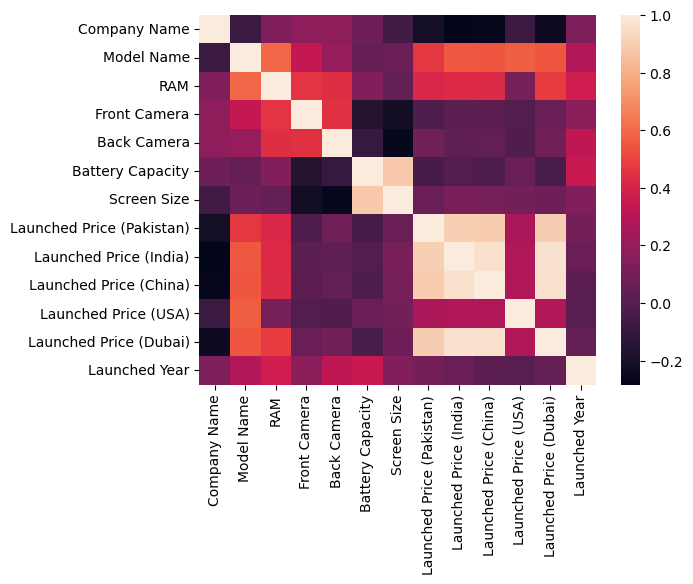

In [165]:
sn.heatmap(phones.corr())
